In [61]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Input, Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from keras import backend as K

In [62]:
face_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

eyes_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

mouth_train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

face_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

eyes_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

mouth_test_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.5, 0.6),
)

In [63]:
face_train_generator = face_train_gen.flow_from_directory(
    'data/train/face_train/',
    target_size=(38, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

# face_train_generator = tf.keras.utils.image_dataset_from_directory(
#     'data/train/face_train/',
#     image_size=(38, 38),
#     batch_size=64,
#     color_mode="grayscale",
#     label_mode="categorical"
# )

Found 776 images belonging to 7 classes.


In [64]:
eyes_train_generator = eyes_train_gen.flow_from_directory(
    'data/train/eyes_train/',
    target_size=(30, 62),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 777 images belonging to 7 classes.


In [65]:
mouth_train_generator = mouth_train_gen.flow_from_directory(
    'data/train/mouth_train/',
    target_size=(30, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 769 images belonging to 7 classes.


In [66]:
face_valid_generator = face_test_gen.flow_from_directory(
    'data/test/face_test/',
    target_size=(38, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

# face_valid_generator = tf.keras.utils.image_dataset_from_directory(
#     'data/test/face_test/',
#     image_size=(38, 38),
#     batch_size=64,
#     color_mode="grayscale",
#     label_mode="categorical"
# )

Found 181 images belonging to 7 classes.


In [67]:
eyes_valid_generator = eyes_test_gen.flow_from_directory(
    'data/test/eyes_test/',
    target_size=(30, 62),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 181 images belonging to 7 classes.


In [68]:
mouth_valid_generator = mouth_test_gen.flow_from_directory(
    'data/test/mouth_test/',
    target_size=(30, 38),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 181 images belonging to 7 classes.


In [69]:
#mean

face_emotion_model = Sequential()

face_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(38, 38, 1), name="conv_1"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))

face_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(18, 18, 6), name="conv_2"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))

face_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), name="conv_3"))
face_emotion_model.add(MaxPooling2D(pool_size=(2, 2), name="pool_3"))

face_emotion_model.add(Flatten(name="face_flatten"))

face_emotion_model.add(Dense(1024, activation='relu'))
face_emotion_model.add(Dropout(0.25))

face_emotion_model.add(Dense(7, activation='softmax'))

face_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

face_emotion_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 36, 36, 6)         60        
                                                                 
 pool_1 (MaxPooling2D)       (None, 18, 18, 6)         0         
                                                                 
 conv_2 (Conv2D)             (None, 16, 16, 16)        880       
                                                                 
 pool_2 (MaxPooling2D)       (None, 8, 8, 16)          0         
                                                                 
 conv_3 (Conv2D)             (None, 6, 6, 32)          4640      
                                                                 
 pool_3 (MaxPooling2D)       (None, 3, 3, 32)          0         
                                                                 
 face_flatten (Flatten)      (None, 288)              

In [118]:
face_train = face_emotion_model.fit(
    face_train_generator,
    steps_per_epoch= 776 // 64,
    epochs=50,
    validation_data=face_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/50
12/12 [==============================] - 0s 31ms/step - loss: 0.3278 - accuracy: 0.9073 - val_loss: 2.3709 - val_accuracy: 0.3594
Epoch 2/50
12/12 [==============================] - 0s 26ms/step - loss: 0.3321 - accuracy: 0.9010 - val_loss: 2.4591 - val_accuracy: 0.2734
Epoch 3/50
12/12 [==============================] - 0s 27ms/step - loss: 0.3388 - accuracy: 0.9045 - val_loss: 2.5930 - val_accuracy: 0.2812
Epoch 4/50
12/12 [==============================] - 0s 28ms/step - loss: 0.3522 - accuracy: 0.8834 - val_loss: 2.6778 - val_accuracy: 0.3203
Epoch 5/50
12/12 [==============================] - 0s 30ms/step - loss: 0.3393 - accuracy: 0.9003 - val_loss: 2.5970 - val_accuracy: 0.2500
Epoch 6/50
12/12 [==============================] - 0s 28ms/step - loss: 0.3573 - accuracy: 0.8792 - val_loss: 2.4732 - val_accuracy: 0.2891
Epoch 7/50
12/12 [==============================] - 0s 28ms/step - loss: 0.3260 - accuracy: 0.9017 - val_loss: 2.3041 - val_accuracy: 0.3125
Epoch 8/50
12

Training: 0.9199438095092773
Validation: 0.2734375


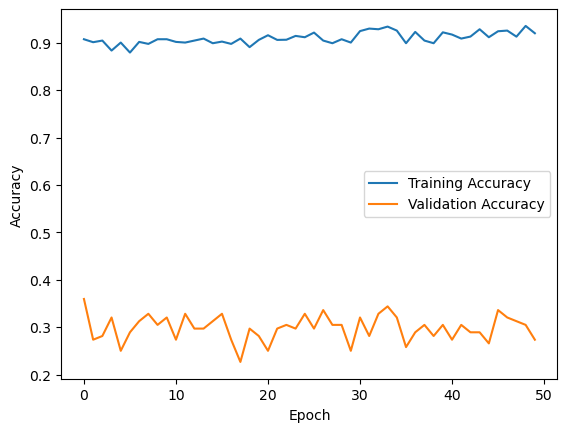

In [120]:
print("Training:", face_train.history['accuracy'][-1])
print("Validation:", face_train.history['val_accuracy'][-1])

plt.plot(face_train.history['accuracy'], label='Training Accuracy')
plt.plot(face_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
face_model = Model(inputs=face_emotion_model.input, outputs=face_emotion_model.get_layer('face_flatten').output)

feature_face_train = face_model.predict(face_train_generator)

feature_face_valid = face_model.predict(face_valid_generator)


3/3 [==============================] - 0s 15ms/step


In [73]:
feature_face_train

array([[2.5869271e-01, 5.1872694e-01, 5.7119399e-01, ..., 4.8404098e-01,
        0.0000000e+00, 0.0000000e+00],
       [4.0990996e-01, 1.9595723e-01, 1.1515947e-01, ..., 2.2332558e-01,
        0.0000000e+00, 4.0334616e-02],
       [4.9598452e-02, 6.0137200e-01, 5.0140369e-01, ..., 1.9128148e-01,
        0.0000000e+00, 1.6804373e-01],
       ...,
       [5.0809878e-01, 0.0000000e+00, 1.8735025e-02, ..., 8.3522427e-01,
        0.0000000e+00, 0.0000000e+00],
       [4.5156732e-01, 2.3515090e-01, 1.0385905e-01, ..., 3.8069749e-01,
        0.0000000e+00, 6.8197306e-04],
       [3.1450239e-01, 6.3204038e-01, 4.8157018e-01, ..., 3.5132608e-01,
        0.0000000e+00, 2.8463196e-02]], dtype=float32)

In [74]:
feature_face_valid

array([[0.48032555, 0.        , 0.        , ..., 0.38827765, 0.        ,
        0.        ],
       [0.1249596 , 0.18419369, 0.19936487, ..., 0.2905847 , 0.        ,
        0.02623525],
       [0.5536633 , 0.        , 0.11015146, ..., 0.4335562 , 0.        ,
        0.        ],
       ...,
       [0.4811916 , 0.1846734 , 0.16176957, ..., 0.4119976 , 0.        ,
        0.01384185],
       [0.38189402, 0.16777757, 0.33680627, ..., 0.38987345, 0.        ,
        0.        ],
       [0.526409  , 0.07873319, 0.1875577 , ..., 0.29029995, 0.        ,
        0.05109133]], dtype=float32)

In [75]:
# variance

eyes_emotion_model = Sequential()

eyes_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(30, 62, 1)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(14, 30, 6)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(6, 14, 16)))
eyes_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

eyes_emotion_model.add(Flatten(name="eyes_flatten"))

eyes_emotion_model.add(Dense(1024, activation='relu'))
eyes_emotion_model.add(Dropout(0.25))

eyes_emotion_model.add(Dense(7, activation='softmax'))

eyes_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

eyes_emotion_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 60, 6)         60        
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 30, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 28, 16)        880       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 6, 14, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 12, 32)         4640      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 2, 6, 32)         

In [121]:
eyes_train = eyes_emotion_model.fit(
    eyes_train_generator,
    steps_per_epoch= 777 // 64,
    epochs=50,
    validation_data=eyes_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/50
12/12 [==============================] - 0s 33ms/step - loss: 0.2977 - accuracy: 0.9032 - val_loss: 3.1170 - val_accuracy: 0.2734
Epoch 2/50
12/12 [==============================] - 0s 27ms/step - loss: 0.2989 - accuracy: 0.9046 - val_loss: 3.4917 - val_accuracy: 0.2500
Epoch 3/50
12/12 [==============================] - 0s 27ms/step - loss: 0.3031 - accuracy: 0.9243 - val_loss: 3.0441 - val_accuracy: 0.3047
Epoch 4/50
12/12 [==============================] - 0s 27ms/step - loss: 0.2814 - accuracy: 0.9144 - val_loss: 3.3015 - val_accuracy: 0.2578
Epoch 5/50
12/12 [==============================] - 0s 26ms/step - loss: 0.2983 - accuracy: 0.9130 - val_loss: 3.3223 - val_accuracy: 0.2656
Epoch 6/50
12/12 [==============================] - 0s 27ms/step - loss: 0.2876 - accuracy: 0.9258 - val_loss: 3.0764 - val_accuracy: 0.2656
Epoch 7/50
12/12 [==============================] - 0s 26ms/step - loss: 0.2729 - accuracy: 0.9297 - val_loss: 3.3318 - val_accuracy: 0.2969
Epoch 8/50
12

Training: 0.9410939812660217
Validation: 0.265625


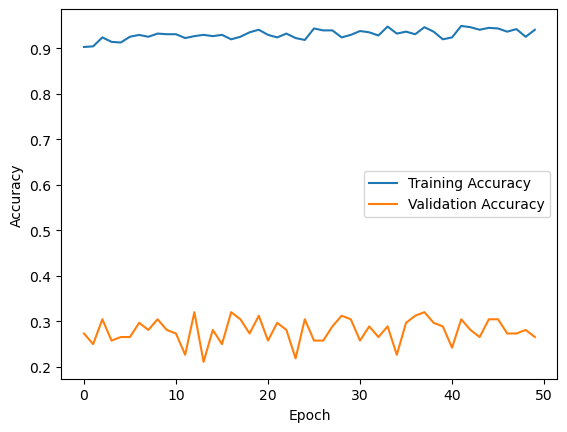

In [122]:
print("Training:", eyes_train.history['accuracy'][-1])
print("Validation:", eyes_train.history['val_accuracy'][-1])

plt.plot(eyes_train.history['accuracy'], label='Training Accuracy')
plt.plot(eyes_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
eyes_feature = Model(inputs=eyes_emotion_model.input, outputs=eyes_emotion_model.get_layer('eyes_flatten').output)
eyes_feature_train = eyes_feature.predict(eyes_train_generator)
eyes_feature_valid = eyes_feature.predict(eyes_valid_generator)


3/3 [==============================] - 0s 18ms/step


In [79]:
eyes_feature_train

array([[0.08185562, 0.24945863, 0.09331698, ..., 0.05305886, 0.08502267,
        0.13263763],
       [0.22329623, 0.28395042, 0.12244371, ..., 0.12447326, 0.01309554,
        0.10921614],
       [0.2742737 , 0.43048656, 0.11009624, ..., 0.07667204, 0.03096351,
        0.19973323],
       ...,
       [0.22716868, 0.4046209 , 0.18958175, ..., 0.01294193, 0.10104385,
        0.08815958],
       [0.1309052 , 0.21436778, 0.10767749, ..., 0.        , 0.0451499 ,
        0.05820803],
       [0.23237729, 0.28938192, 0.13775454, ..., 0.10335657, 0.05701723,
        0.06422707]], dtype=float32)

In [80]:
eyes_feature_valid

array([[0.07100354, 0.15673326, 0.16308783, ..., 0.10916021, 0.09442575,
        0.09023122],
       [0.15725702, 0.25377816, 0.11064259, ..., 0.20617351, 0.15042096,
        0.19493158],
       [0.23385505, 0.24580286, 0.16972291, ..., 0.08435431, 0.08156496,
        0.13843209],
       ...,
       [0.25174692, 0.4558173 , 0.18303776, ..., 0.07229197, 0.00197211,
        0.03507975],
       [0.1534239 , 0.29625088, 0.07823927, ..., 0.0012621 , 0.        ,
        0.04144567],
       [0.22219533, 0.3621193 , 0.16974135, ..., 0.        , 0.17806499,
        0.01692654]], dtype=float32)

In [81]:
# variance

mouth_emotion_model = Sequential()

mouth_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(30, 38, 1)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(14, 18, 6)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(6, 8, 16)))
mouth_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

mouth_emotion_model.add(Flatten(name="mouth_flatten"))

mouth_emotion_model.add(Dense(1024, activation='relu'))
mouth_emotion_model.add(Dropout(0.25))

mouth_emotion_model.add(Dense(7, activation='softmax'))

mouth_emotion_model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

mouth_emotion_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 36, 6)         60        
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 18, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 16, 16)        880       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 8, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 6, 32)          4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 2, 3, 32)        

In [117]:
mouth_train = mouth_emotion_model.fit(
    mouth_train_generator,
    steps_per_epoch= 769 // 64,
    epochs=50,
    validation_data=mouth_valid_generator,
    validation_steps= 181 // 64  
)

Epoch 1/50
12/12 [==============================] - 0s 30ms/step - loss: 0.3141 - accuracy: 0.9035 - val_loss: 2.0703 - val_accuracy: 0.4688
Epoch 2/50
12/12 [==============================] - 0s 24ms/step - loss: 0.3196 - accuracy: 0.8993 - val_loss: 2.1562 - val_accuracy: 0.4453
Epoch 3/50
12/12 [==============================] - 0s 26ms/step - loss: 0.3221 - accuracy: 0.9050 - val_loss: 1.8200 - val_accuracy: 0.5312
Epoch 4/50
12/12 [==============================] - 0s 27ms/step - loss: 0.3230 - accuracy: 0.9050 - val_loss: 2.0393 - val_accuracy: 0.4453
Epoch 5/50
12/12 [==============================] - 0s 29ms/step - loss: 0.3587 - accuracy: 0.8879 - val_loss: 2.0434 - val_accuracy: 0.4453
Epoch 6/50
12/12 [==============================] - 0s 28ms/step - loss: 0.3227 - accuracy: 0.9021 - val_loss: 2.2301 - val_accuracy: 0.3906
Epoch 7/50
12/12 [==============================] - 0s 27ms/step - loss: 0.3364 - accuracy: 0.8936 - val_loss: 2.3295 - val_accuracy: 0.4297
Epoch 8/50
12

Training: 0.9078013896942139
Validation: 0.4375


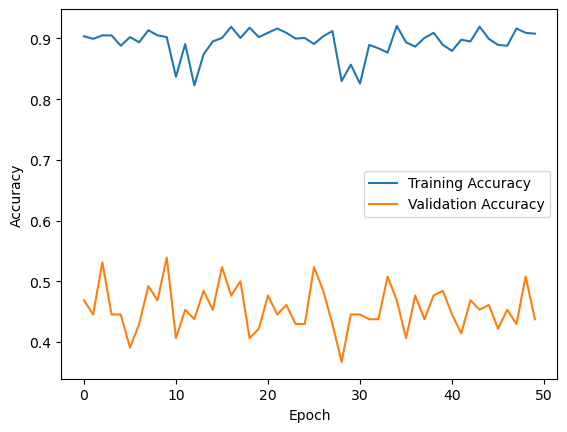

In [119]:
print("Training:", mouth_train.history['accuracy'][-1])
print("Validation:", mouth_train.history['val_accuracy'][-1])

plt.plot(mouth_train.history['accuracy'], label='Training Accuracy')
plt.plot(mouth_train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
mouth_feature = Model(inputs=mouth_emotion_model.input, outputs=mouth_emotion_model.get_layer('mouth_flatten').output)
mouth_feature_train = mouth_feature.predict(mouth_train_generator)
mouth_feature_valid = mouth_feature.predict(mouth_valid_generator)


3/3 [==============================] - 0s 17ms/step


In [85]:
mouth_feature_train

array([[0.1461953 , 0.35589412, 0.00128148, ..., 0.15600012, 0.00379503,
        0.05275397],
       [0.21712334, 0.32229695, 0.05222702, ..., 0.13885565, 0.06336764,
        0.1987941 ],
       [0.09850168, 0.4027052 , 0.04387513, ..., 0.34336406, 0.        ,
        0.06590948],
       ...,
       [0.31793803, 0.4188789 , 0.10545947, ..., 0.14957988, 0.00390814,
        0.06057185],
       [0.18194166, 0.31360835, 0.1461134 , ..., 0.224466  , 0.        ,
        0.1300354 ],
       [0.1399701 , 0.25296825, 0.01422854, ..., 0.2619371 , 0.        ,
        0.10983873]], dtype=float32)

In [86]:
mouth_feature_valid

array([[0.18394725, 0.29085273, 0.03777465, ..., 0.16872878, 0.        ,
        0.10555789],
       [0.13508227, 0.41149005, 0.19818395, ..., 0.25955006, 0.00143505,
        0.12938598],
       [0.10899442, 0.32366875, 0.06126782, ..., 0.24806482, 0.        ,
        0.06103154],
       ...,
       [0.16554588, 0.23811716, 0.10104969, ..., 0.        , 0.2024291 ,
        0.1967888 ],
       [0.20337851, 0.22411947, 0.09475688, ..., 0.00762425, 0.16213353,
        0.16851972],
       [0.3021527 , 0.29472342, 0.13949192, ..., 0.13282964, 0.1772336 ,
        0.20035324]], dtype=float32)

In [87]:
concatenate_feature = Concatenate([feature_face_train, feature_face_valid, 
                                   eyes_feature_train, eyes_feature_valid, 
                                   mouth_feature_train, mouth_feature_valid])

In [88]:
all_feature_model = Sequential()
all_feature_model.add(concatenate_feature)

all_feature_model.add(Dense(864, activation='relu'))
all_feature_model.add(Dropout(0.5))
all_feature_model.add(Dense(7, activation='softmax'))

all_feature_model.compile(loss='categorical_crossentropy', 
                          optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=1e-6), 
                          metrics=['accuracy'])


In [89]:
all_feature_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# from keras.layers import Input, concatenate, Dense, Flatten, Dropout, Conv2D, MaxPooling2D

# # Input layers
# face_layer = Input(shape=(38, 38, 1))
# eyes_layer = Input(shape=(30, 62, 1))
# mouth_layer = Input(shape=(30, 38, 1))

# # Define the CNN blocks for each input
# def convolutional_block(layer):
#     conv = Conv2D(6, kernel_size=(3, 3), activation='relu')(layer)
#     pool = MaxPooling2D(pool_size=(2, 2))(conv)
#     conv = Conv2D(16, kernel_size=(3, 3), activation='relu')(pool)
#     pool = MaxPooling2D(pool_size=(2, 2))(conv)
#     conv = Conv2D(32, kernel_size=(3, 3), activation='relu')(pool)
#     pool = MaxPooling2D(pool_size=(2, 2))(conv)
#     flatten = Flatten()(pool)
#     dense = Dense(1024, activation='relu')(flatten)
#     dropout = Dropout(0.5)(dense)
#     return dropout

# # Apply the CNN blocks to each input
# face_features = convolutional_block(face_layer)
# eyes_features = convolutional_block(eyes_layer)
# mouth_features = convolutional_block(mouth_layer)

# # Concatenate the features
# concatenated_features = concatenate([face_features, eyes_features, mouth_features])

# # Define the Aggregated Feature Vector Fusion Layer
# fusion_layer = Dense(864, activation='relu')(concatenated_features)

# # Output layer
# output_layer = Dense(7, activation='softmax')(fusion_layer)

# # Define the model
# model = Model(inputs=[face_layer, eyes_layer, mouth_layer], outputs=output_layer)

# model.summary()


In [ ]:
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten
# from keras.callbacks import Callback

# # Fungsi untuk mendapatkan feature map dari lapisan tertentu
# def get_feature_map(model, layer_name, input_data):
#     intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
#     return intermediate_layer_model.predict(input_data)

# # Callback untuk menyimpan feature map pada setiap epoch
# class SaveFeatureMapCallback(Callback):
#     def __init__(self, model, layer_name, input_data):
#         self.model = model
#         self.layer_name = layer_name
#         self.input_data = input_data
#         self.feature_maps = []

#     def on_epoch_end(self, epoch, logs=None):
#         feature_map = get_feature_map(self.model, self.layer_name, self.input_data)
#         self.feature_maps.append(feature_map)

# # Membuat model
# face_emotion_model = Sequential()
# face_emotion_model.add(Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(38, 38, 1)))
# face_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# face_emotion_model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(18, 18, 6)))
# face_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# face_emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
# face_emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
# face_emotion_model.add(Flatten())

# # Tentukan lapisan yang ingin Anda ambil feature map-nya
# layer_name = 'conv2d_1'  # Sesuaikan dengan nama lapisan yang sesuai dengan model Anda

# # Buat dan tentukan callback
# save_feature_map_callback = SaveFeatureMapCallback(face_emotion_model, layer_name, input_data)

# # Latih model dengan callback
# face_emotion_model.fit(input_data, y_train, epochs=10, callbacks=[save_feature_map_callback])

# # Feature map sekarang dapat diakses melalui save_feature_map_callback.feature_maps
